# Ejercicio SVM datos Eurocopa 2012
A partir del archivo Euro_2012_stats_TEAM, se pide:

1. Obtener la matriz de correlación. ¿Qué columnas están mejor correlacionadas?

2. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos

3. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

    - % de goles por disparo: 40%
    - Total shots (inc. Blocked): 102
    - Corners Taken: 5
    - Passes: 82
    - Dribbles: 23

## 1. Importa las librerias necesarias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Carga los datos

In [4]:
df = pd.read_csv('data/Euro_2012_stats_TEAM.csv')
df.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


## 3. Obtener la matriz de correlación con TODAS las variables. ¿Hay algunas columnas que estén muy correlacionadas?

In [6]:
df.corr()

,Goals,Shots on target,Shots off target,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,Passes,Passes completed,...,Goals conceded,Saves made,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
Goals,1.000000,0.804193,0.403821,0.650109,0.200512,0.730437,0.023094,0.349330,0.838497,0.830062,...,-0.337689,0.143912,0.663876,0.483833,0.703043,0.337709,-3.580574e-01,0.727830,0.727830,0.136067
Shots on target,0.804193,1.000000,0.611185,0.886090,0.212932,0.478610,-0.229945,0.210571,0.930337,0.923242,...,-0.214415,0.085059,0.765949,0.658353,0.696263,0.544307,-3.340500e-01,0.821342,0.821342,0.249516
Shots off target,0.403821,0.611185,1.000000,0.887032,0.581655,0.126783,-0.173221,0.002284,0.624451,0.612998,...,-0.139274,0.086157,0.615058,0.434815,0.344626,0.534186,-3.377661e-01,0.544974,0.544974,0.045973
Total shots (inc. Blocked),0.650109,0.886090,0.887032,1.000000,0.400121,0.299397,-0.234668,0.125738,0.875698,0.864279,...,-0.184740,0.148269,0.766215,0.623288,0.589635,0.622268,-3.604662e-01,0.763336,0.763336,0.157812
Hit Woodwork,0.200512,0.212932,0.581655,0.400121,1.000000,-0.076923,-0.041345,0.020174,0.095882,0.073814,...,0.062541,-0.230524,0.141180,0.303987,0.113657,0.319708,-2.820513e-01,0.204511,0.204511,-0.189466
Penalty goals,0.730437,0.478610,0.126783,0.299397,-0.076923,1.000000,0.537484,-0.020174,0.545294,0.550720,...,-0.020847,0.058761,0.528185,0.114404,0.627220,0.085467,1.794872e-01,0.531727,0.531727,0.351866
Penalties not scored,0.023094,-0.229945,-0.173221,-0.234668,-0.041345,0.537484,1.000000,-0.357830,-0.169613,-0.179278,...,0.302532,0.051019,0.163643,-0.107169,0.210417,0.127603,5.374838e-01,0.084796,0.084796,0.480079
Headed goals,0.349330,0.210571,0.002284,0.125738,0.020174,-0.020174,-0.357830,1.000000,0.213073,0.200605,...,-0.344447,0.458773,0.157215,0.117445,0.188786,0.067245,-3.429623e-01,0.216077,0.216077,-0.447214
Passes,0.838497,0.930337,0.624451,0.875698,0.095882,0.545294,-0.169613,0.213073,1.000000,0.997697,...,-0.284982,0.207240,0.773382,0.549248,0.731938,0.465799,-4.002506e-01,0.800546,0.800546,0.232214
Passes completed,0.830062,0.923242,0.612998,0.864279,0.073814,0.550720,-0.179278,0.200605,0.997697,1.000000,...,-0.300837,0.184878,0.738845,0.499351,0.704802,0.420410,-4.062897e-01,0.766326,0.766326,0.213345


In [35]:
df2 = df.loc[:, ('Goals', 'Shooting Accuracy')]
df2['Shooting Accuracy'] = df['Shooting Accuracy'].str[:-1].astype(float)
df2.corr()

,Goals,Shooting Accuracy
Goals,1.00000,0.52121
Shooting Accuracy,0.52121,1.00000


<AxesSubplot:>

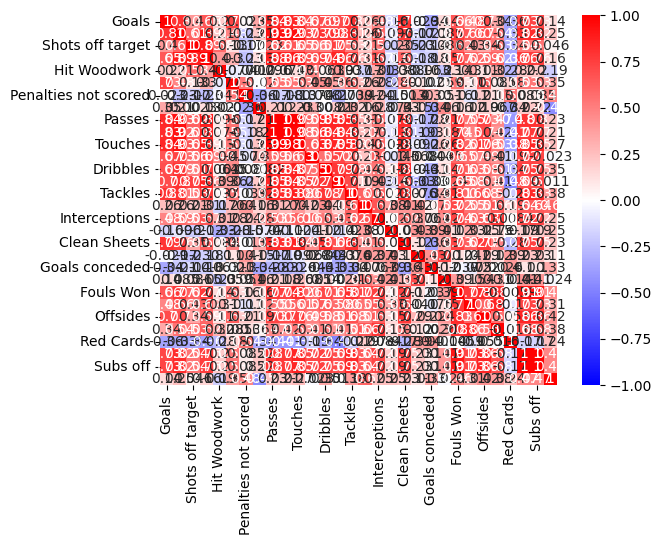

In [7]:
sns.heatmap(df.corr(),vmin=-1,vmax=1,cmap='bwr',annot=True)


## 4. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos

In [41]:
X=df["Shooting Accuracy"].str[:-1].astype(float)
y=df["Goals"]

In [58]:
#Separamos los datos en train y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.8,
                                                    random_state=0)

In [59]:
#Hacemos la regresión lineal 
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train.to_numpy().reshape(-1, 1), y_train)

LinearRegression()

In [61]:
y_hat = lm.predict(X_test.to_numpy().reshape(-1, 1))
print(y_hat)

[5.29997592 3.73793799 2.94297226 4.95130674]


In [62]:
res = y_test - y_hat
res

1   -1.299976
6    1.262062
8   -0.942972
9   -2.951307
Name: Goals, dtype: float64

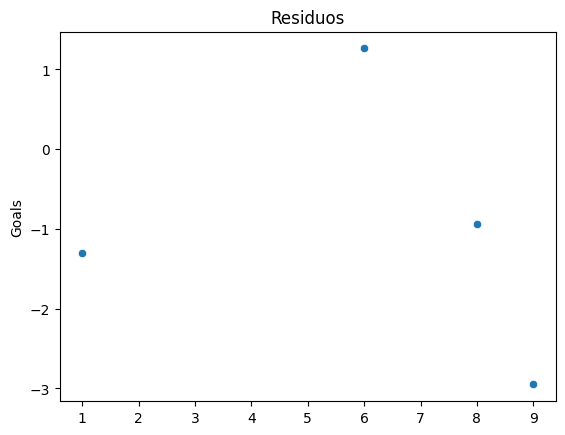

In [63]:
sns.scatterplot(res)
plt.title("Residuos");

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

mae = mean_absolute_error(y_test, y_hat)
mape = mean_absolute_percentage_error(y_test, y_hat)
rmse = np.sqrt(mean_squared_error(y_test, y_hat))
r2 = r2_score(y_test, y_hat)

print("MAE:", mae)
print("MAPE:", mape)
print("RMSE:", rmse)
print("R2:", r2)

MAE: 1.614079230689701
MAPE: 0.6311364699863922
RMSE: 1.7945853304815966
R2: -0.9084660790398469


In [ ]:
#Ahora hacemos regresión polinómica

In [65]:
from sklearn.preprocessing import PolynomialFeatures

In [66]:
lm_pf = LinearRegression()

In [68]:
pf = PolynomialFeatures(2, include_bias=False)
X_train_pf = pf.fit_transform(X_train.to_numpy().reshape(-1, 1))
X_test_pf = pf.transform(X_test.to_numpy().reshape(-1, 1))

In [69]:
lm_pf.fit(X_train_pf, y_train)

LinearRegression()

In [70]:
y_hat_pf_train = lm_pf.predict(X_train_pf)
y_hat_pf = lm_pf.predict(X_test_pf)

In [72]:
rmse_train = mean_squared_error(y_train, y_hat_pf_train) ** 0.5
r2_train = r2_score(y_train, y_hat_pf_train)
print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

print("\n")

rmse_test = mean_squared_error(y_test, y_hat_pf) ** 0.5
r2_test = r2_score(y_test, y_hat_pf)

print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The model performance for the training set
-------------------------------------------
RMSE of training set is 2.3842209856824135
R2 score of training set is 0.35798478585580207


The model performance for the test set
-------------------------------------------
RMSE of test set is 1.4851213764811397
R2 score of test set is -0.3070136313370284


In [ ]:
#Ahora hacemos SVM

In [84]:
from sklearn.svm import LinearSVC
linear_SVC=LinearSVC(C=1, loss='hinge', max_iter=10000)
linear_SVC.fit(X_train.to_numpy().reshape(-1, 1),y_train)

c:\users\rocio\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(C=1, loss='hinge', max_iter=10000)

In [85]:
predictions = linear_SVC.predict(X_test.to_numpy().reshape(-1, 1))
print(predictions)

[6 5 5 6]


In [86]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, predictions)
acc

0.25

In [87]:
r2_testSVM = r2_score(y_test, predictions)
r2_testSVM

-3.2962962962962967

In [ ]:
#Ahora hacemos SVM con hiperparámetros

In [89]:
from sklearn.svm import SVC

In [90]:
SVC=SVC(C=100, gamma=10, probability=True)
SVC.fit(X_train.to_numpy().reshape(-1, 1),y_train)

SVC(C=100, gamma=10, probability=True)

In [92]:
predict =SVC.predict(X_test.to_numpy().reshape(-1, 1))
print(predict)

[5 5 5 5]


In [93]:
accSVM=accuracy_score(y_test, predict)
accSVM

0.25

In [94]:
r2_test= r2_score(y_test, predict)
r2_test

-1.8148148148148149

## 5. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

    - % de goles por disparo: 40%
    - Total shots (inc. Blocked): 102
    - Corners Taken: 5
    - Passes: 82
    - Dribbles: 23